In [14]:
import random
import torch

from utils.Logger import showPlot
from utils.Timer import asMinutes, timeSince

%load_ext autoreload
from data.example_Data import Lang, prepareData
from model.seq2seq_Model import (
    Seq2Seq_GRU_Attn_ptModel, 
    Seq2SeqTranslate_ptTokenizer,
)
from baseline_ExpTrain import example_ExpTrain
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load data

In [15]:
%cd  '_data_example'

if False:
    !wget https://download.pytorch.org/tutorial/data.zip -O data.zip
    !unzip -o data.zip
!ls
%cd  ../

/Volumes/GoogleDrive/マイドライブ/__datasets__/[CV][NLP]「センター試験xml」/annotate_img/datas/center_exam_2011/construct/Experiment/_data_example
data                data.zip            small_parallel_enja
/Volumes/GoogleDrive/マイドライブ/__datasets__/[CV][NLP]「センター試験xml」/annotate_img/datas/center_exam_2011/construct/Experiment


## setup Experiment

In [16]:
hidden_size = 256

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## setup Data

In [17]:
## Data
input_lang, output_lang, pairs = prepareData(
        'eng', 'fra', '_data_example/data', False)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 95170 sentence pairs
Counting words...
Counted words:
eng 10025
fra 16813
['my boss was forced to resign .', 'mon patron a ete force de demissionner .']


## setup Model

In [18]:
## Model
tokenizer = Seq2SeqTranslate_ptTokenizer(
                input_lang, output_lang, device)
seq2seq_model = Seq2Seq_GRU_Attn_ptModel(
                input_lang.n_words, output_lang.n_words, hidden_size,
                tokenizer, device, dropout_p=0.1)

## setup exec

100%|██████████| 50/50 [00:07<00:00,  6.67it/s]


<Figure size 432x288 with 0 Axes>

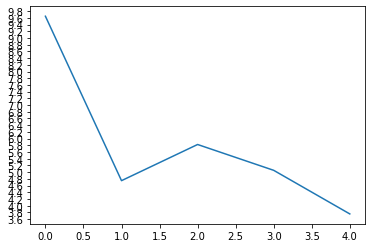

In [19]:
exp_train = example_ExpTrain(pairs)
# test
exp_train.exec(seq2seq_model, 50,
                print_every=1000, plot_every=10, 
                learning_rate=0.01, log_dir='_logs')
# 本実験
# exp_train.exec(seq2seq_model, 75000,
#                 print_every=5000, plot_every=1000, 
#                 learning_rate=0.01, log_dir='_logs')

___

## evaluate
- random print
- Acc
- BLEU などの 評価指標

In [20]:
%load_ext autoreload
from baseline_ExpEval import eval_print_randomly
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
eval_print_randomly(seq2seq_model, pairs)

> i didn t even try to respond .
= je n ai meme pas essaye de repliquer .
< je 

> do you think tom is sick ?
= pensez vous que tom soit malade ?
< 

> he will come tomorrow .
= il viendra demain .
< je 

> say what you have to say .
= dites ce que vous avez a dire .
< je 

> it was a great blow to us .
= ce fut un coup dur pour nous .
< je 

> what narrow stairs !
= que ces escaliers sont etroits !
< 

> it s hard to tell .
= c est difficile a dire .
< je 

> it seems that i have lost my keys .
= il semble que j ai perdu ma cle .
< 

> i m not really busy .
= je ne suis pas vraiment occupe .
< je 

> we will make an exception of your case .
= nous ferons une exception dans ton cas .
< je 

